In [25]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

## Read the scraped reviews text data file :

In [26]:
data = pd.read_csv('D:/Yogabar/Solution/data/review_text_data.csv')

In [27]:
data.head()

,reviews
0,\r\n\r\n It's very tasty and affordable and filled with all the goodies needed for your diet\r\n\r\n
1,"\r\n\r\n I really want to applaud the ppl at yogabar who come up with such great combinations, the perfect taste, they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!\r\n\r\n"
2,"\r\n\r\n Morning breakfast is now easy with this delicious crunchy muesli. Me being a fruits and nuts lover, loved it and it has all berries which gives awesome taste. All healthy ingredients like oats, brown rice flakes, raisins, cranberries, apricots. Black currants ,quinoa, pumpkin, chia and flax seeds, this is a combined mixture of all healthy foods. Just 200 calories and I am sorted in morning. Tastes best with cold milk. Even it makes a great dry snacking option anytime during the day. Perfect when you are on balanced diet and will recommend you all to give it a try.\r\n\r\n"
3,"\r\n\r\n I'm a big fan of Yogabar range of Mueslis and order them frequently. I decided to buy the 700 gm super saver pack when it was cheaper during the great Indian sale. Got it for Rs 349. However, the pack was full of lumps rather than the usual consistency. It was really annoying as it altered the taste a lot. All the lumps were overtly sweet and rest of the muesli was dry and tasteless. Moreover, they didn't dissolve in milk and by the time it did, the rest of the cereal got soggy. I really hope it was a one time thing and won't happen again in the future. I'm still waiting to hear from Yogabars.Hope this review is helpful.\r\n\r\n"
4,"\r\n\r\n Quality of product has deteriorated badly. The two boxes I purchased got ""burnt grains"". Also some of the seeds float when milk is put, meaning the company is now using expired items. Even the rasins are put like lump of balls...Only thing that is good is the packing... not the actual product.Anyway, this company planned that they will initially gain customer confidence, get good rating and later give 3rd class product.Very disappointing...\r\n\r\n"


## Remove escape sequences (`/n`,`/r`..) from review text in `df`:

In [28]:
df = data.copy()
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True) 

In [29]:
df.sample(20)

,reviews
398,Good taste
672,Good for health...
534,awesome in taste... must try at least ones
348,I like it..
367,Loved the taste ! It is very filling. It tastes good with Milk or you also try with yogurt and fruits.
850,First time eaten... good test
824,"I really want to applaud the ppl at yogabar who come up with such great combinations, the perfect taste, they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!"
715,Loving the taste..
755,Good product
137,"This is the first time I had muesli and I am in love with it. It's very healthy and tastes amazing, no need to add extra sugar in the milk. The fruits in it tastes amazing. It keeps me full for a long time. It's a perfect breakfast and super healthy."


In [30]:
df.size

869

## Drop duplicate `reviews` from `df` (if any) :

In [31]:
df.drop_duplicates(subset = "reviews", keep = False, inplace = True) 

In [32]:
df.size

770

In [33]:
import nltk
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [34]:
import string   
import re

## Remove punctuations and emojis :

In [35]:
def remove_punct_emoji(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text.encode('ascii', 'ignore').decode('ascii')

df['reviews_punct'] = df['reviews'].apply(lambda x: remove_punct_emoji(x))

## Tokenize the reviews to generate a list of words

In [36]:
def tokenize(text):
    text = re.split('\W+', text)
    return text

df['reviews_tokenized'] = df['reviews_punct'].apply(lambda x: tokenize(x.lower()))

## Remove `stopwords` from `text`:

In [37]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['reviews_nonstop'] = df['reviews_tokenized'].apply(lambda x: remove_stopwords(x))

In [38]:
## Reduce tokenized words to root form :

In [39]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['reviews_stemmed'] = df['reviews_nonstop'].apply(lambda x: stemming(x))

In [40]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed
230,"Folks, I like the good quality of the product and what I dislike is it's a bit pricy. I suggest for the same price, they should offer 500g instead of 400g. That would be true value for money. Else it's fine.",Folks I like the good quality of the product and what I dislike is its a bit pricy I suggest for the same price they should offer g instead of g That would be true value for money Else its fine,"[, folks, i, like, the, good, quality, of, the, product, and, what, i, dislike, is, its, a, bit, pricy, i, suggest, for, the, same, price, they, should, offer, g, instead, of, g, that, would, be, true, value, for, money, else, its, fine]","[, folks, like, good, quality, product, dislike, bit, pricy, suggest, price, offer, g, instead, g, would, true, value, money, else, fine]","[, folk, like, good, qualiti, product, dislik, bit, prici, suggest, price, offer, g, instead, g, would, true, valu, money, els, fine]"
295,Was looking for a healthy yet delicious breakfast since a while!This has to be hands down one of the best.It's yummy and makes me feel pretty energetic throughout the morning.,Was looking for a healthy yet delicious breakfast since a whileThis has to be hands down one of the bestIts yummy and makes me feel pretty energetic throughout the morning,"[, was, looking, for, a, healthy, yet, delicious, breakfast, since, a, whilethis, has, to, be, hands, down, one, of, the, bestits, yummy, and, makes, me, feel, pretty, energetic, throughout, the, morning]","[, looking, healthy, yet, delicious, breakfast, since, whilethis, hands, one, bestits, yummy, makes, feel, pretty, energetic, throughout, morning]","[, look, healthi, yet, delici, breakfast, sinc, whilethi, hand, one, bestit, yummi, make, feel, pretti, energet, throughout, morn]"
463,Very tasty and healthy breakfast,Very tasty and healthy breakfast,"[, very, tasty, and, healthy, breakfast]","[, tasty, healthy, breakfast]","[, tasti, healthi, breakfast]"
581,Superb Museli I ever had..!!,Superb Museli I ever had,"[, superb, museli, i, ever, had]","[, superb, museli, ever]","[, superb, muse, ever]"
82,"This the second time I bought this product,last time it was flavourful,but this time it doesn't have any flavour,and the quantity of beaten rice is more.charging higher price for such quality of product. This time it was the muesli was moist.",This the second time I bought this productlast time it was flavourfulbut this time it doesnt have any flavourand the quantity of beaten rice is morecharging higher price for such quality of product This time it was the muesli was moist,"[, this, the, second, time, i, bought, this, productlast, time, it, was, flavourfulbut, this, time, it, doesnt, have, any, flavourand, the, quantity, of, beaten, rice, is, morecharging, higher, price, for, such, quality, of, product, this, time, it, was, the, muesli, was, moist]","[, second, time, bought, productlast, time, flavourfulbut, time, doesnt, flavourand, quantity, beaten, rice, morecharging, higher, price, quality, product, time, muesli, moist]","[, second, time, bought, productlast, time, flavourfulbut, time, doesnt, flavourand, quantiti, beaten, rice, morecharg, higher, price, qualiti, product, time, muesli, moist]"
37,"The Muesli is a perfect mixture of Wheat, Corn grits, Rolled Barley, Rolled oats, Rice & Dry Fruits & Nuts- 20%(Raisins, Almonds).It is filled up with Vitamins, Minerals and Antioxidant which is needed for you everyday just mix some fruits what all you like and the best dish is ready for you.",The Muesli is a perfect mixture of Wheat Corn grits Rolled Barley Rolled oats Rice Dry Fruits Nuts Raisins AlmondsIt is filled up with Vitamins Minerals and Antioxidant which is needed for you everyday just mix some fruits what all you like and the best dish is ready for you,"[, the, muesli, is, a, perfect, mixture, of, wheat, corn, grits, rolled, barley, rolled, oats, rice, dry, fruits, nuts, raisins, almondsit, is,

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

## Generate `score` of any input `sentence`:

In [43]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

## Generate compound score of a review/`text` :

In [44]:
def compound_score(text):
    comp = sentiment_analyzer_scores(text)
    return comp['compound']

## Classify review as positive, negative and neutral as according to `score` :

In [45]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

## Adding `sentiment_score` and `review_category` fields to `df` :

In [46]:
df['sentiment_score'] = df['reviews'].apply(lambda x:compound_score(x))
df['review_category'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [47]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed,sentiment_score,review_category
772,I have tried many types of muselis but this one is the best so far. Right mix of ingredients with freshness and taste. Liked it so much can survive whole day on this museli. Me and my son eat it everyday. And m happy that now we can get it in super market as well. Thanks to the manufacturer. First time giving 5 starts to purchases made.,I have tried many types of muselis but this one is the best so far Right mix of ingredients with freshness and taste Liked it so much can survive whole day on this museli Me and my son eat it everyday And m happy that now we can get it in super market as well Thanks to the manufacturer First time giving starts to purchases made,"[, i, have, tried, many, types, of, muselis, but, this, one, is, the, best, so, far, right, mix, of, ingredients, with, freshness, and, taste, liked, it, so, much, can, survive, whole, day, on, this, museli, me, and, my, son, eat, it, everyday, and, m, happy, that, now, we, can, get, it, in, super, market, as, well, thanks, to, the, manufacturer, first, time, giving, starts, to, purchases, made]","[, tried, many, types, muselis, one, best, far, right, mix, ingredients, freshness, taste, liked, much, survive, whole, day, museli, son, eat, everyday, happy, get, super, market, well, thanks, manufacturer, first, time, giving, starts, purchases, made]","[, tri, mani, type, muse, one, best, far, right, mix, ingredi, fresh, tast, like, much, surviv, whole, day, muse, son, eat, everyday, happi, get, super, market, well, thank, manufactur, first, time, give, start, purchas, made]",0.9855,positive
113,Found it bit expensive but its tasty and better than many muesli which tatse if sugar only..Only if it comes with sugarfree version(sucralose or Erythritol) it would be best,Found it bit expensive but its tasty and better than many muesli which tatse if sugar onlyOnly if it comes with sugarfree versionsucralose or Erythritol it would be best,"[, found, it, bit, expensive, but, its, tasty, and, better, than, many, muesli, which, tatse, if, sugar, onlyonly, if, it, comes, with, sugarfree, versionsucralose, or, erythritol, it, would, be, best]","[, found, bit, expensive, tasty, better, many, muesli, tatse, sugar, onlyonly, comes, sugarfree, versionsucralose, erythritol, would, best]","[, found, bit, expens, tasti, better, mani, muesli, tats, sugar, onlyonli, come, sugarfre, versionsucralos, erythritol, would, best]",0.8922,positive
205,Dey v smelling v bad,Dey v smelling v bad,"[, dey, v, smelling, v, bad]","[, dey, v, smelling, v, bad]","[, dey, v, smell, v, bad]",-0.5423,negative
537,Love the taste.,Love the taste,"[, love, the, taste]","[, love, taste]","[, love, tast]",0.6369,positive
831,This muesli is perfect for healthy breakfast. It's made up of 92% whole grains and full of Proteins and fibre which is absolutely necessary for healthy body and mind. you will feel energetic whole day long.,This muesli is perfect for healthy breakfast Its made up of whole grains and full of Proteins and fibre which is absolutely necessary for healthy body and mind you will feel energetic whole day long,"[, this, muesli, is, perfect, for, healthy, breakfast, its, made, up, of, whole, grains, and, full, of, proteins, and, fibre, which, is, absolutely, necessary, for, healthy, body, and, mind, you, will, feel, energetic, whole, day, long]","[, muesli, perfect, healthy, breakfast, made, whole, grains, full, proteins, fibre, absolutely, necessary, healthy, body, mind, feel, energetic, whole, day, long]","[, muesli, perfect, healthi, breakfast, made, whole, grain, full, protein, fibr, absolut, necessari, healthi, bodi, mind, feel, energet, whole, day, long]",0.9055,positive
21,"This is a perfect beginning for anyone in the morning.It fulfills body and mind requirements in a balanced manner.1. Light yet filling breakfast high in nutrition.2. Rich in Nuts and dried fruits: Almonds, Raisins, Dried C

## Generate Wordcloud for all values of `review_category` :

(-0.5, 399.5, 199.5, -0.5)

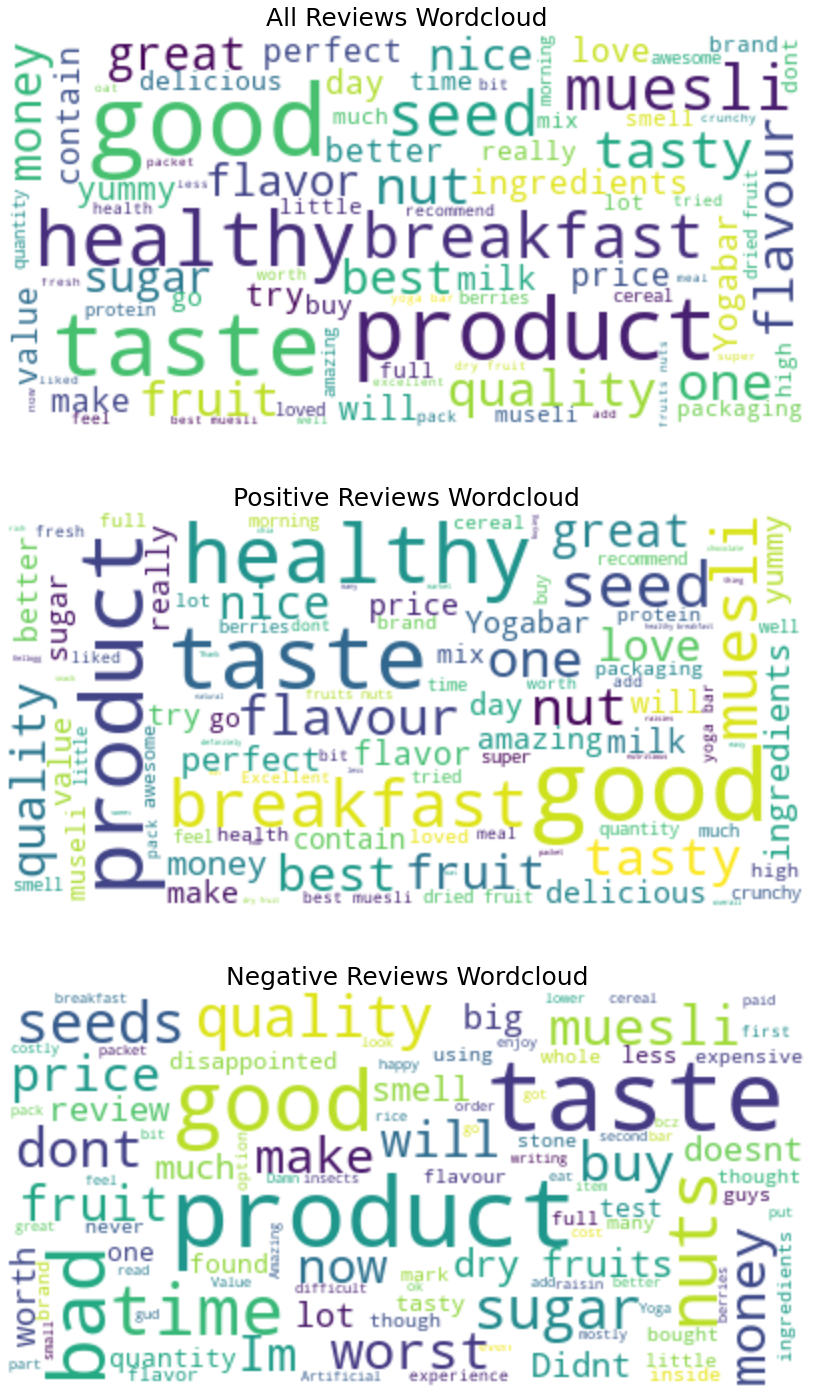

In [48]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Split reviews dataframe (df) to according to positive and negative class
df_positive = df[df['review_category']=='positive']
df_negative = df[df['review_category']=='negative']

# Create Wordcloud strings
reviews_all = " ".join(review for review in df.reviews_punct)
reviews_positive = " ".join(review for review in df_positive.reviews_punct)
reviews_negative = " ".join(review for review in df_negative.reviews_punct)

fig, ax = plt.subplots(3, 1, figsize  = (25,25))

# Generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_all)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_negative)

# Display the generated wordcloud images:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Reviews Wordcloud', fontsize=25)
ax[0].axis('off')
ax[1].imshow(wordcloud_positive, interpolation='bilinear')
ax[1].set_title('Positive Reviews Wordcloud',fontsize=25)
ax[1].axis('off')
ax[2].imshow(wordcloud_negative, interpolation='bilinear')
ax[2].set_title('Negative Reviews Wordcloud',fontsize=25)
ax[2].axis('off')

## Generate Histogram for Distribution of `review_category` :

Text(0.5, 1.0, 'Distribution of Reviews Category')

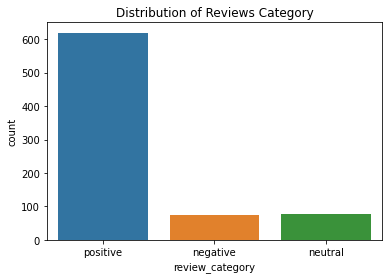

In [49]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")